**Estudiante:** César Emilio García Ávalos

**Actividad:** M2_AI2_Gestión de facturas

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ruta = ('https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/datos_facturas.csv?_sm_au_=iVVjpm8RlpHJHq5F26q8vKHV6CTMc')
datos = pd.read_csv(ruta, sep = ';')
df = pd.DataFrame(datos)
df.head()

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18,118
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27,177
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,"13,5","88,5"
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36,236
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,"22,5","147,5"


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               45 non-null     int64 
 1   fecha            45 non-null     object
 2   mes              45 non-null     object
 3   cliente          45 non-null     object
 4   factura_pagada   45 non-null     object
 5   importe_factura  45 non-null     int64 
 6   tipo_IVA         45 non-null     object
 7   porcentaje_IVA   45 non-null     int64 
 8   IVA              45 non-null     object
 9   total_pagado     45 non-null     object
dtypes: int64(3), object(7)
memory usage: 3.6+ KB


# **PARTE 1**

In [131]:
#Conversion de la variable total pagado a numérica para realizar cálculos, se sustituyen las comas por puntos
if df['total_pagado'].dtype == object:
  df['total_pagado'] = pd.to_numeric(df['total_pagado'].str.replace(',','.'), errors= 'coerce')
else:
  print("La variable ya se ha convertido a numérica")

In [132]:
#Cálculo de media de la columna total pagado del dataframe df
mediaTP = df['total_pagado'].mean()
print('Media total pagado:', mediaTP)
#Cálculo de mediana de la columna total pagado del dataframe df
medianaTP = df['total_pagado'].median()
print('Mediana total pagado:', medianaTP)
#Este método calcula la moda de los valores en la columna 'total_pagado'. La función mode() en pandas retorna
#una serie que contiene los valores de moda, ya que puede haber más de uno si hay empates.
#[0]: Como la moda puede ser una serie (en caso de empate) y solo queremos el primer valor de moda, accedemos a él utilizando [0].
modaTP = df['total_pagado'].mode()[0]
print('Moda total pagado:', modaTP)

Media total pagado: 147.30888888888887
Mediana total pagado: 135.0
Moda total pagado: 118.0


**Media (promedio) total pagado:** La media es de aproximadamente 147.31. Esto significa que, en promedio, se paga alrededor de 147.31 unidades monetarias en total.

**Mediana total pagado:** La mediana es de 135. Esto indica que el 50% de los valores totales pagados son iguales o menores que 135, y el otro 50% son iguales o mayores que 135. La mediana es útil para entender el valor central de los datos y es menos sensible a los valores atípicos que la media.

**Moda total pagado:** La moda es 118. Esto significa que 118 es el valor más frecuente o común entre los datos de total pagado.

In [133]:
#Se calcula el rango utilizando una función de NumPy que calcula el rango de un array, que es la diferencia entre el valor máximo y el valor mínimo.
rangoTP = np.ptp(df['total_pagado'])
#Este método calcula la varianza de los valores en la columna 'total_pagado'.
#La varianza es una medida de dispersión que indica qué tan dispersos están los valores con respecto a la media.
varianzaTP = df['total_pagado'].var()
#Este método calcula la desviación estándar de los valores en la columna 'total_pagado'.
#La desviación estándar es otra medida de dispersión que indica la dispersión promedio de los valores con respecto a la media.
desvTP = df['total_pagado'].std()
#Aquí se calcula el coeficiente de variación, que es una medida relativa de la dispersión de los datos.
#Se calcula dividiendo la desviación estándar por la media y multiplicándolo por 100 para expresarlo como un porcentaje.
coeficiente_variacionTP = (desvTP / df['total_pagado'].mean()) * 100
print("Rango:", rangoTP)
print("Varianza:", varianzaTP)
print("Desviación estándar:", desvTP)
print("Coeficiente de variación:", coeficiente_variacionTP)


Rango: 206.5
Varianza: 3356.593555555555
Desviación estándar: 57.93611615871015
Coeficiente de variación: 39.329681050279184


**Rango:** El rango es 206.5 unidades monetarias para total pagado, puede ser indicativo de variabilidad pues se observa un mínimo de total pagado de 29.5 unidades monetarias a un máximo de total pagado en facturas de 236 unidades monetarias.

**Desviación estándar y varianza:** La desviación estándar indica que el monto de total pagado se desvía de la media en 57.94 unidades monetarias, además, la varianza indica que los datos se encuentran dispersos, con un valor de 3,356.59 unidades monetarias al cuadrado

**CV:** El coeficiente de variación al ser mayor que 30% indica que el conjunto de datos es no homogéneo, el promedio no será representativo del conjunto de datos.

In [134]:
#Se calcula el rango intercuartílico, que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1).
#Se obtiene restando el valor del tercer cuartil (quantile(0.75)) del valor del primer cuartil (quantile(0.25)).
rango_intercuartilico = df['total_pagado'].quantile(0.75) - df['total_pagado'].quantile(0.25)
#Se calcula el primer cuartil, que es el valor por debajo del cual cae el 25% de los datos. Esto se hace utilizando el método quantile(0.25).
cuartil_primero = df['total_pagado'].quantile(0.25)
#Se calcula el percentil 90, que es el valor por debajo del cual cae el 90% de los datos. Esto se hace utilizando el método quantile(0.90).
percentil_90 = df['total_pagado'].quantile(0.90)
print("Rango intercuartílico:", rango_intercuartilico)
print("Cuartil primero (percentil 25):", cuartil_primero)
print("Percentil 90:", percentil_90)

Rango intercuartílico: 81.0
Cuartil primero (percentil 25): 108.0
Percentil 90: 236.0


**Rango Intercuartílico:** El RIC es de 81.0 unidades monetarias. Esto significa que el 50% central de los datos de total pagado se encuentran dentro de un rango de 81.0 unidades monetarias, desde el cuartil primero (Q1) hasta el cuartil tercero (Q3).

**Cuartil primero (Percentil 25):** El cuartil primero (Q1) es de 108.0 unidades monetarias. Esto indica que el 25% de los datos de total pagado son iguales o inferiores a 108.0 unidades monetarias.

**Percentil 90:** El percentil 90 es de 236.0 unidades monetarias. Esto significa que el 90% de los datos de total pagado son iguales o inferiores a 236.0 unidades monetarias.

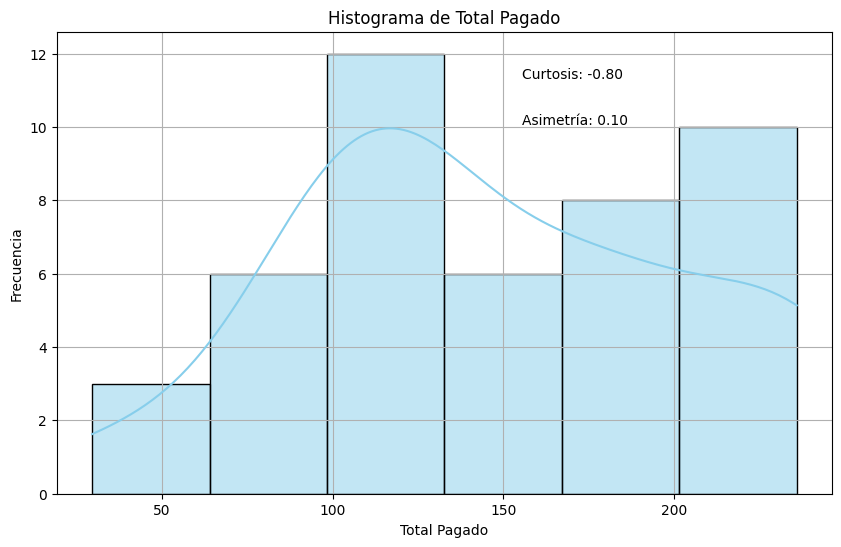

In [135]:
# Calcular la curtosis y la asimetría
curtosis = df['total_pagado'].kurtosis()
asimetria = df['total_pagado'].skew()
#Calculando el número óptimo de bins usando la regla de Sturges
n_bins = int(1 + np.log2(len(df['total_pagado'])))
# Creando el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['total_pagado'], kde=True, color='skyblue', bins= n_bins)
plt.title('Histograma de Total Pagado')
plt.xlabel('Total Pagado')
plt.ylabel('Frecuencia')

# Mostrar medidas de concentración y forma
plt.text(0.6, 0.9, f'Curtosis: {curtosis:.2f}', transform=plt.gca().transAxes)
plt.text(0.6, 0.8, f'Asimetría: {asimetria:.2f}', transform=plt.gca().transAxes)

plt.grid(True)
plt.show()

La forma del histograma no se asemeja a una distribución normal de los datos, el valor de la curtosis de -0.8 indica que la distribución es más achatada que una distribución normal, se identifica un sesgo de los datos a la derecha al tener un dato de asimetría positivo de 0.1, la cola derecha es más pesada.

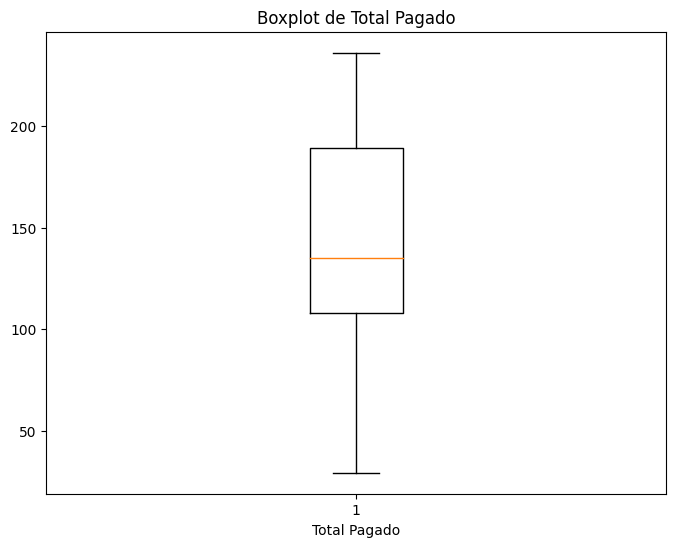

In [136]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['total_pagado'])
plt.title('Boxplot de Total Pagado')
plt.xlabel('Total Pagado')
plt.show()

El boxplot no muestra valores atípicos, los bigotes se extienden de 29 a 236 en cuanto al total pagado, la media está ubicada en 147.30 unidades monetarias, además de observar la mediana ubicada en 135

**Comentarios Parte 1:**
*  La media del total pagado es de aproximadamente 147.31 unidades monetarias. Esto significa que, en promedio, el monto total pagado en todas las facturas es alrededor de 147.31 unidades monetarias.
*   La mediana del total pagado es de 135 unidades monetarias. Esto indica que el valor medio del total pagado está en el centro del conjunto de datos, y la mitad de los valores están por encima y la otra mitad por debajo de este valor.
*   La moda del total pagado es de 118 unidades monetarias. Esto indica que el valor más común o frecuente del total pagado en las facturas es de 118 unidades monetarias.
*   El rango del total pagado es de 206.5 unidades monetarias. Esto representa la diferencia entre el valor máximo y el valor mínimo de los pagos realizados en todas las facturas.
*   La varianza del total pagado es de aproximadamente 3356.59 unidades monetarias al cuadrado. Indica cuánto se dispersan los valores del total pagado alrededor de la media.
*   La desviación estándar del total pagado es de aproximadamente 57.94 unidades monetarias. Es una medida de dispersión que indica cuánto se alejan los valores del total pagado de la media.
*   El coeficiente de variación es 39.33%. Al ser CV>30% Indica una alta variabilidad relativa. Esto sugiere que los datos tienen una dispersión alta con respecto a la media por lo que los datos pueden ser menos predecibles.
*   El rango intercuartílico es de 81 unidades monetarias. Esto indica la dispersión de los datos dentro del rango intercuartílico, que abarca el 50% central de los datos.
*   El cuartil primero (percentil 25) es de 108 unidades monetarias. Esto significa que el 25% de los pagos son iguales o inferiores a este valor.
*   El percentil 90 es de 236 unidades monetarias. Esto indica que el 90% de los pagos son iguales o inferiores a este valor.











# **PARTE 2**

In [137]:
#Se filtra el DataFrame df para incluir solo las filas donde el valor de la columna 'factura_pagada' es igual a 'si'.
#Esto significa que solo se consideran las facturas que han sido pagadas.
df_filtrado = df.loc[df['factura_pagada']=='si']
#Se agrupan los datos filtrados por el nombre del cliente y calcula la suma total pagada por cada cliente.
cliente_mas_pago = df_filtrado.groupby('cliente')['total_pagado'].sum()
print(cliente_mas_pago)

cliente
clienteA    1534.0
clienteB     924.0
clienteC     584.5
clienteD    1534.0
Name: total_pagado, dtype: float64


Los clientes A y D han pagado 1,534 unidades monetarias cada uno, ambos son los que han pagado más dinero en concepto de facturas, el que menos ha pagado es el cliente C con un importe de 584.5 unidades monetarias.

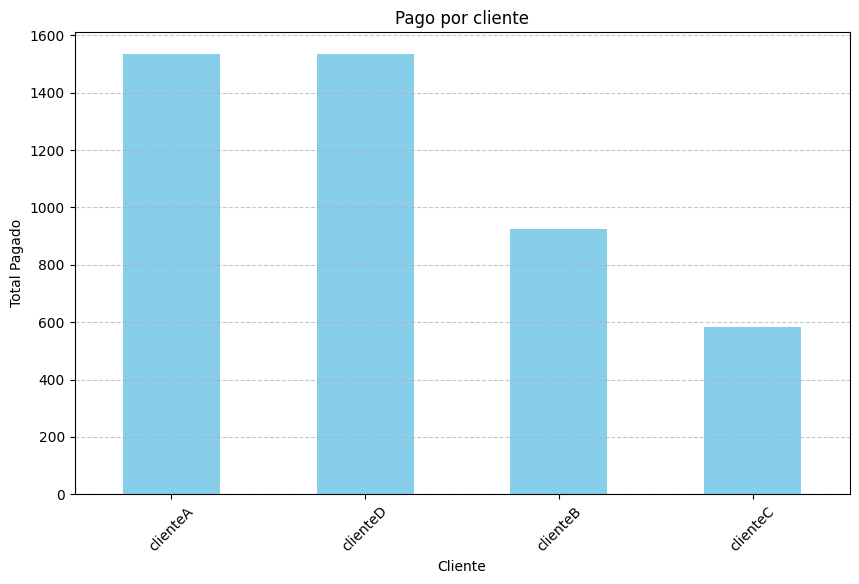

In [138]:
#Se filtra el DataFrame df para incluir solo las filas donde el valor de la columna 'factura_pagada' es igual a 'si'.
#Esto significa que solo se consideran las facturas que han sido pagadas.
df_filtrado = df.loc[df['factura_pagada']=='si']
#Se agrupan los datos filtrados por el nombre del cliente y calcula la suma total pagada por cada cliente.
cliente_mas_pago = df_filtrado.groupby('cliente')['total_pagado'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
cliente_mas_pago.plot(kind='bar', color='skyblue')
plt.title('Pago por cliente')
plt.xlabel('Cliente')
plt.ylabel('Total Pagado')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [139]:
#Se filtra el DataFrame df para incluir solo las filas donde el valor de la columna 'mes' es igual a 'Febrero' y donde el valor de la columna 'factura_pagada' es igual a 'si'.
#Esto significa que solo se consideran las facturas pagadas en febrero.
febrero_df = df.loc[(df['mes']=='Febrero') & (df['factura_pagada']=='si')]
#value_counts() cuenta el número de veces que aparece cada cliente en el DataFrame filtrado y idxmin() devuelve el índice correspondiente al mínimo valor,
#que es el cliente que ha pagado menos facturas.
cliente_menos_facturas = febrero_df['cliente'].value_counts().idxmin()
numero_facturas_menos = febrero_df['cliente'].value_counts().min()
print("El cliente que ha pagado menos facturas en febrero es:", cliente_menos_facturas)
print("Número de facturas pagadas por este cliente en febrero:", numero_facturas_menos)

El cliente que ha pagado menos facturas en febrero es: clienteC
Número de facturas pagadas por este cliente en febrero: 1


In [140]:
#Se filtra el DataFrame df para incluir solo las filas donde el valor de la columna 'factura_pagada' es igual a 'no'.
#Esto significa que solo se consideran las facturas que no han sido pagadas.
df_filtrado = df.loc[df['factura_pagada']=='no']
#Se agrupan los datos filtrados por el nombre del cliente y calcula la suma total pendiente a pagar por cada cliente.
cliente_mas_pago = df_filtrado.groupby('cliente')['total_pagado'].sum()
print(cliente_mas_pago)

cliente
clienteA    565.0
clienteB    413.0
clienteC    570.0
clienteD    504.4
Name: total_pagado, dtype: float64


El cliente que ha pagado menor cantidad de facturas en febrero es el clienteC, además es el cliente que debe un mayor monto (570 unidades monetarias) en cuanto a facturas pendientes de pagar.

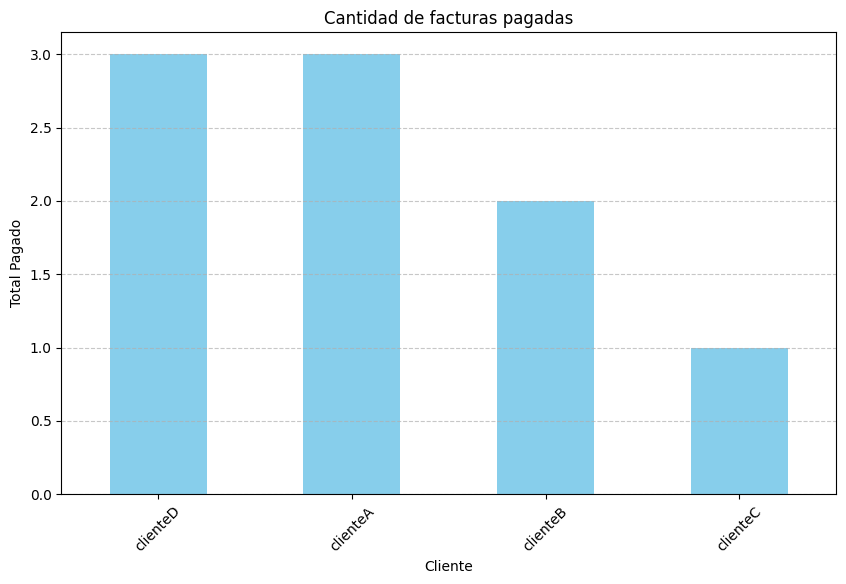

In [141]:
#Se filtra el DataFrame df para incluir solo las filas donde el valor de la columna 'mes' es igual a 'Febrero' y donde el valor de la columna 'factura_pagada' es igual a 'si'.
#Esto significa que solo se consideran las facturas pagadas en febrero.
febrero_df = df.loc[(df['mes']=='Febrero') & (df['factura_pagada']=='si')]
#value_counts() cuenta el número de veces que aparece cada cliente en el DataFrame filtrado
cliente_menos_facturas = febrero_df['cliente'].value_counts()
plt.figure(figsize=(10, 6))
cliente_menos_facturas.plot(kind='bar', color='skyblue')
plt.title('Cantidad de facturas pagadas')
plt.xlabel('Cliente')
plt.ylabel('Total Pagado')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Comentarios Parte 2:**


*   **Cliente más rentable:** Los clientes "clienteA" y "clienteD" han pagado el total más alto en todas las facturas (1,534 unidades monetarias cada uno). Sería beneficioso para la compañía mantener una relación sólida con estos clientes y explorar oportunidades para aumentar la participación de los mismos, ofreciendo descuentos o servicios adicionales.

*   **Cliente menos activo en febrero:** El cliente "clienteC" ha pagado el menor número de facturas en febrero (1 factura), además es el que tiene un mayor monto pendiente a pagar (570 unidades monetarias). Sería importante investigar las razones detrás de esta baja actividad y considerar estrategias para fomentar una mayor participación de este cliente, como ofrecer incentivos especiales o mejorar la calidad del servicio.



# **PARTE 3**

In [142]:
#Se realiza la conversión de tipo de dato de la columna IVA a numérico para poder operar con ella, se sustituyen las comas por puntos
if df['IVA'].dtype == object:
  df['IVA'] = pd.to_numeric(df['IVA'].str.replace(',','.'), errors= 'coerce')
else:
  print("La variable ya se ha convertido a numérica")
covarianza = df['IVA'].astype(float).cov(df['total_pagado'])
print("La covarianza entre el IVA y el total pagado es:", covarianza)

La covarianza entre el IVA y el total pagado es: 526.768808080808


La covarianza entre el IVA y el total pagado es positiva de 526.77, esto indica que, cuando una variable aumenta la otra incrementa también y viceversa, al incrementar el total pagado el IVA también incrementará, esto es logico pues el total pagado se calcula como el **importe de la factura*(1+%IVA)**, es una relación directamente proporcional.

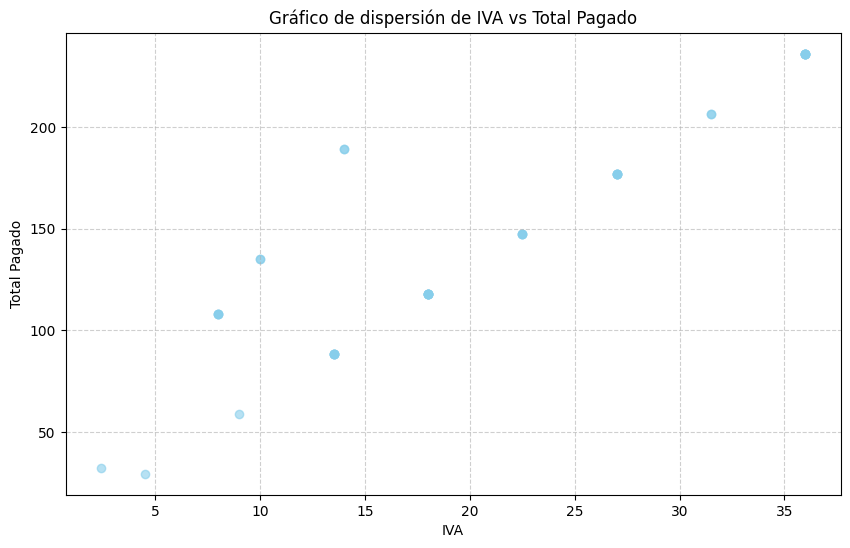

In [143]:
# Grafico de dispersión de IVA vs total_pagado
plt.figure(figsize=(10, 6))
plt.scatter(df['IVA'], df['total_pagado'], color='skyblue', alpha=0.6)
plt.title('Gráfico de dispersión de IVA vs Total Pagado')
plt.xlabel('IVA')
plt.ylabel('Total Pagado')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

El gráfico de dispersión muestra que a medida que incrementa el total pagado, el IVA incrementa de igual manera.

**Comentarios Parte 3:**
Basarse únicamente en el gráfico de dispersión y la covarianza para construir un modelo predictivo podría no ser suficiente, lógicamente cuando el valor del IVA aumenta, el total pagado tiende a aumentar también, y viceversa, esto se confirma al obtener un valor de covarianza positiva entre ambas variables, indicando una relación positiva entre las mismas (si total pagado aumenta IVA también aumenta) de igual manera se visualiza en el gráfico de dispersión la relación entre las variables previamente mencionadas. Sin embargo, la magnitud de la covarianza no dice mucho sobre la fuerza de la relación o significancia estadística de las variables IVA y Total Pagado, de igual manera no permite predecir el comportamiento de los pagos, sería necesario utilizar análisis de correlaciones, regresiones, etc.

# **PARTE 4**

**Parte 4 Recomendaciones:**

1.   Mantener un enfoque en la retención y satisfacción del cliente, especialmente con clientes de alto valor como "clienteA" y "clienteD", ambos aportan el 67.02% del monto total pagado, por lo que se debe garantizar que ambos clientes mantengan la misma tendencia de pago.
2.   Implementar estrategias para incentivar la participación de clientes menos activos, como programas de fidelización o descuentos personalizados, ofrecer facilidades de pago aplicables para clientes como "clienteC" (cliente que menos pagos efectuó en febrero y que adeuda un total de 570 unidades monetarias).
3. Monitorear de cerca las tendencias en los pagos y el comportamiento del cliente para identificar oportunidades de mejora y anticipar cambios en la demanda o el mercado.





In [144]:
#Se filtra el DataFrame df para incluir solo las filas donde el valor de la columna 'factura_pagada' es igual a 'si'.
#Esto significa que solo se consideran las facturas que han sido pagadas.
df_filtrado = df.loc[df['factura_pagada']=='si']
#Se agrupan los datos filtrados por el nombre del cliente y calcula la suma total pagada por cada cliente.
pagos_totales = df_filtrado.groupby('cliente')['total_pagado'].sum()
#Calcular la suma total de todos los montos pagados
total_pagado_total = pagos_totales.sum()
proporcion_pagada_por_cliente = (pagos_totales*100)/ total_pagado_total
# Mostrar los resultados
print(proporcion_pagada_por_cliente)

cliente
clienteA    33.519065
clienteB    20.190102
clienteC    12.771769
clienteD    33.519065
Name: total_pagado, dtype: float64
